<a href="https://colab.research.google.com/github/Rohit-Potnuru/Reinforcement-Learning-by-David-Silver/blob/main/Assignment/Implementation_of_Easy21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Implementation Easy 21

Implementation of Easy21

You should write an environment that implements the game Easy21.

Specifically, write a function, named step, which takes as
 input:
 1. a state s (dealer’s first card 1–10 and the player’s sum 1–21)
 2. an action a (hit or stick)
 output:
 a sample of the next state s' (which may be terminal if the game is finished)
 reward r

We will be using this environment for model-free reinforcement
learning, and you should not explicitly represent the transition matrix for the
MDP. There is no discounting (γ = 1). You should treat the dealer’s moves as
part of the environment, i.e. calling step with a stick action will play out the
dealer’s cards and return the final reward and terminal state.

In [1]:
import random

In [2]:
class State:
    def __init__(self, dealer_card, player_card, is_terminal=False):
        """
        :type self.is_terminal: bool
        :type self.dealer: int
        :type self.player: int
        """
        self.dealer = dealer_card.value
        self.player = player_card.value
        self.is_terminal = is_terminal
    def __str__(self):
      return f'dealer value: {self.dealer}, player value: {self.player}, game status: {"playing" if self.is_terminal else "completed"}'

In [3]:
class Card:
    def __init__(self, force_black=False):
        """
        :type self.is_terminal: bool
        :type self.dealer: int
        :type self.player: int
        """
        self.value = random.randint(1,10)
        self.absolute_value = self.value
        if force_black or random.randint(1, 3) != 1:
          self.is_black = True
        else:
          self.is_black = False
          self.value = -self.value
        self.is_red = not self.is_black

In [4]:
from enum import Enum
class Actions(Enum):

    # Possible actions
    hit = 0
    stick = 1

    @staticmethod
    def get_action(n):
        return Actions.hit if n==0 else Actions.stick

In [5]:
def step(state, action):
  nextState = state
  r = 0
  if action == Actions.stick:
    while not nextState.is_terminal:
      nextState.dealer += Card().value
      if nextState.dealer < 1 or nextState.dealer > 21:
          nextState.is_terminal = True
          r = 1
      elif nextState.dealer >= 17:
        nextState.is_terminal = True
        if nextState.dealer > nextState.player:
          r = -1
        elif nextState.dealer < nextState.player:
          r = 1
  else:
    nextState.player += Card().value
    if nextState.player < 1 or nextState.player > 21:
      nextState.is_terminal = True
      r = -1
  return state, r


In [6]:
def play(is_print = False):
  state = State(Card(True), Card(True))
  action = Actions.hit

  while not state.is_terminal:
    state, r = step(state, action)
    if is_print:
      print(f'{state}, Reward: {r}')
    if state.player > 17:
      action = Actions.stick
  return r

In [30]:
total_reward = 0
total_wins = 0
total_draws = 0
for i in range(1, 101):
  print(f'-------Game {i}-------')
  r = play(True)
  total_reward += r
  if r == 1:
    total_wins += 1
  elif r == 0:
    total_draws += 1
  print('-----------------------')

-------Game 1-------
dealer value: 5, player value: 5, game status: completed, Reward: 0
dealer value: 5, player value: -5, game status: playing, Reward: -1
-----------------------
-------Game 2-------
dealer value: 4, player value: 5, game status: completed, Reward: 0
dealer value: 4, player value: -1, game status: playing, Reward: -1
-----------------------
-------Game 3-------
dealer value: 9, player value: 2, game status: completed, Reward: 0
dealer value: 9, player value: -5, game status: playing, Reward: -1
-----------------------
-------Game 4-------
dealer value: 1, player value: 6, game status: completed, Reward: 0
dealer value: 1, player value: 8, game status: completed, Reward: 0
dealer value: 1, player value: 7, game status: completed, Reward: 0
dealer value: 1, player value: 15, game status: completed, Reward: 0
dealer value: 1, player value: 11, game status: completed, Reward: 0
dealer value: 1, player value: 14, game status: completed, Reward: 0
dealer value: 1, player v

In [8]:
-1000 + total_wins + total_draws, total_wins, total_draws, total_reward

(-656, 316, 28, -340)

## Testing

In [9]:
import matplotlib.pyplot as plt

### Testing Card Value Distribution

In [17]:
cardCounts = [0] * 10
nPicks = 1_000_000
for _ in range(nPicks):
  cardCounts[Card().absolute_value - 1] += 1

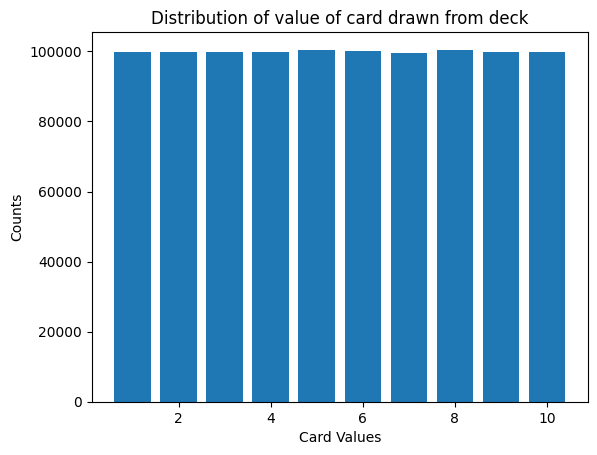

In [18]:
plt.title('Distribution of value of card drawn from deck')
plt.bar(range(1, 11), cardCounts)
plt.xlabel('Card Values')
plt.ylabel('Counts')
plt.show()

### Testing Card Color Distribution

In [22]:
cardColorCounts = [0] * 2 # Black is 0, red is 1
nPicks = 1_000_000
for _ in range(nPicks):
  cardColorCounts[Card().is_red] += 1

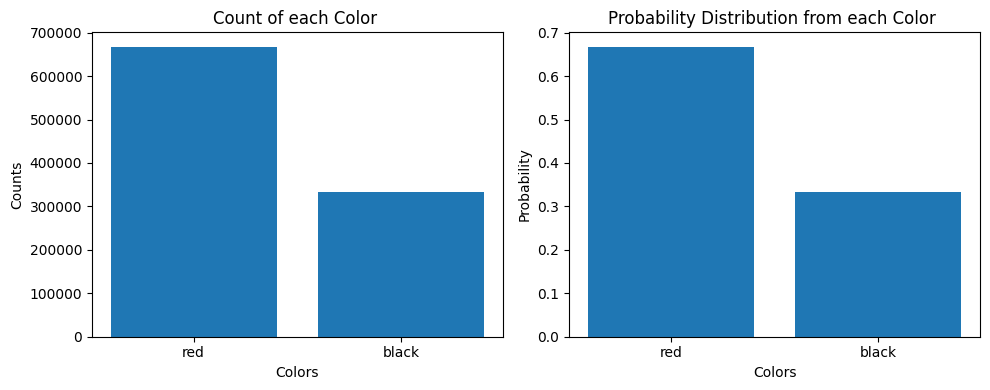

In [25]:
# Convert counts to probabilities
total_counts = nPicks
colors = ["red", "black"]
probabilities = [count / total_counts for count in cardColorCounts]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

axs[0].bar(colors, cardColorCounts)
axs[0].set_xlabel('Colors')
axs[0].set_ylabel('Counts')
axs[0].set_title('Count of each Color ')

axs[1].bar(colors, probabilities)
axs[1].set_xlabel('Colors')
axs[1].set_ylabel('Probability')
axs[1].set_title('Probability Distribution from each Color ')

# Adjust layout
plt.tight_layout()

plt.show()

### Test: If the player’s sum exceeds 21, or becomes less than 1, then she “goes bust” and loses the game (reward -1)

In [26]:
def play_test_player_bust():
    s = State(Card(True),Card(True))
    a = Actions.hit

    while not s.is_terminal:
        s, r = step(s, a)
        # print ("state = %s, %s, %s" % (s.player, s.dealer, s.term))
    return s, r

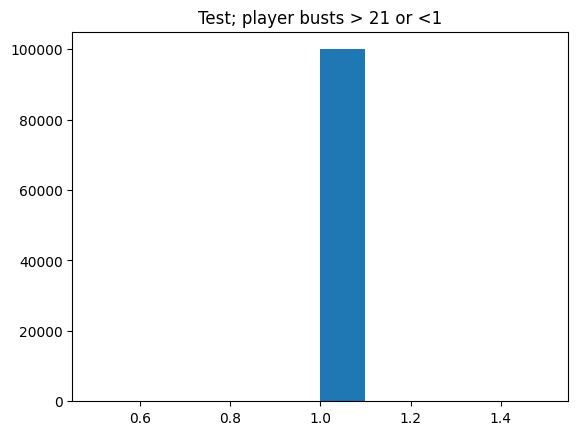

In [28]:
values = []
for i in range(0,100000):
    s, r = play_test_player_bust()
    if s.player > 21:
        values.append(1)
    elif s.player < 1:
        values.append(1)
    else:
        values.append(-1)
        print("error!!!!")


plt.title('Test; player busts > 21 or <1')
plt.hist(values)
plt.show()

# Monte-Carlo Control in Easy21